In [ ]:
# incase you havent installed this in the system, you can just run this cell
!pip3 install pandas
!pip3 install numpy

In [3]:
import pandas as pd
import os
import numpy as np

#for question 3
import matplotlib.pyplot as plt
import random

# Question 2

In [48]:
#read data 
training = np.genfromtxt('HW1_data/1/train_1_5.csv',dtype= None,delimiter=',')
test = np.genfromtxt('HW1_data/1/test_1_5.csv',dtype= None,delimiter=',')

#get the training data out
print(training)

[[-0.72576667  0.02276306  1.        ]
 [-0.81127309  0.03552441  1.        ]
 [-0.7637943   0.01847137  1.        ]
 ...
 [-0.63857584  0.0603133   1.        ]
 [-0.50418127  0.4572745  -1.        ]
 [-0.58254497  0.26045176 -1.        ]]


In [49]:
#initialise the parameters for perceptron
#theta is a vector
#offset is scalar
def initial_params():
    offset = 0.0
    theta = np.array([0.0,0.0])
    return offset, theta

In [50]:
print(training[:, :-1])

[[-0.72576667  0.02276306]
 [-0.81127309  0.03552441]
 [-0.7637943   0.01847137]
 ...
 [-0.63857584  0.0603133 ]
 [-0.50418127  0.4572745 ]
 [-0.58254497  0.26045176]]


In [51]:
print(training[:,-1])

[ 1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1.
  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.
  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.
  1. -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.
  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.
 -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.
  1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.
 -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1.
 -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.
  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.
  1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1.
  1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1

In [52]:
def training_perceptron(offset, epochs, theta, training_data):
    #iterate with each epoch
    for i in range(epochs):
        #get the whole data out from the training data
        training_examples_x = training_data[:,:-1]
        training_examples_y = training_data[:,-1]
        #each training example
        example = 1
        for x,y  in zip(training_examples_x, training_examples_y):
            #check for non realisation
            if (y * ((np.dot(theta, x))+offset))<=0:
                #update
                theta = theta + (y*x)
                offset = offset + y
            print(f"Example {example} has the current theta value of {theta} and the current offset value of {offset}")
            example += 1 
    return theta, offset


In [53]:
#put test set on the test data
def test_perceptron(test_data, theta, offset):
    test_examples_x = test_data[:,:-1]
    test_examples_y = test_data[:,-1]
    accuracy = []
    for x_test, y_test in zip(test_examples_x,test_examples_y):
        #y(θx+θo) > 0
        if (y_test * (theta.dot(x_test)+offset)) > 0:
            accuracy.append (True)
    return theta, offset, len(accuracy)/len(test_data)
    

## Question 2(a)

In [54]:
# 1 epoch
initial_offset, initial_theta = initial_params()
theta,offset = training_perceptron(offset=initial_offset,epochs=1,theta=initial_theta,training_data=training)
print(theta,offset)

#test

Example 1 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 2 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 3 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 4 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 5 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 6 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 7 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 8 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 9 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 10 has the current theta value of [ 0.19358205 -0.88343483] and t

In [55]:
theta, offset, accuracy = test_perceptron(test,theta,offset)
print(f"The value of theta is {theta}, the value of the offset is {offset}, the value of accuracy is {accuracy}")

The value of theta is [-2.4483233  -5.88190688], the value of the offset is 0.0, the value of accuracy is 0.9670658682634731


## Question 2(b)

In [56]:
theta, offset = training_perceptron(initial_offset, theta = initial_theta,epochs=5,training_data = training)
print(f"the value of theta is {theta}")
print(f"The value of the offset is {offset}")

Example 1 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 2 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 3 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 4 has the current theta value of [-0.72576667  0.02276306] and the current offset value of 1.0
Example 5 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 6 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 7 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 8 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 9 has the current theta value of [-0.41013624 -0.46682084] and the current offset value of 0.0
Example 10 has the current theta value of [ 0.19358205 -0.88343483] and t

In [57]:
# test 
theta, offset, accuracy = test_perceptron(test,theta,offset)
print(f"The value of theta is {theta}, the value of the offset is {offset}, the value of accuracy is {accuracy}")

The value of theta is [-2.05895878 -8.83521606], the value of the offset is 1.0, the value of accuracy is 0.9670658682634731


## Question 2(c)

Hi TA! Here's the instructions to run the code!


Run the cell above the "Question 2" heading

Run all the cells above the Question 2(a) one by one from top to bottom <span style="background-color:yellow"> in order <span style="color:red">one by one</span></span>

Ensure that there is no error in this. 

For Question 2(a) section, there are two cells. same thing, run in the same order from top to bottom sequentially. The bottom cell is the cell that ends at question 2(a) before the start of section 2(b)

Same thing goes for question 2(b)




# Question 3

In [4]:
#read input
x_input = np.genfromtxt('HW1_data/2/hw1x.dat',delimiter=',')
X = np.c_[np.ones(len(x_input)),x_input]
y = np.genfromtxt('HW1_data/2/hw1y.dat',delimiter=',')


## Question 3(a)

In [5]:
#closed form 
def closed_form_regression(x,y):
    a = np.transpose(x).dot(x)
    b = np.transpose(x).dot(y)
    a_inv = np.linalg.pinv(a)
    theta = a_inv.dot(b)
    return theta

In [6]:
theta = closed_form_regression(X,y)
predicted_y = X.dot(theta)

In [7]:
def error(actual,predicted,n):
    diff = actual - predicted
    training_err = (diff**2)/2
    avg = np.sum(training_err)/n
    return avg

error(y, predicted_y,len(X))

0.5812605752543937

The value of theta is [3.2447227  1.78157138], the training error is 0.5812605752543937


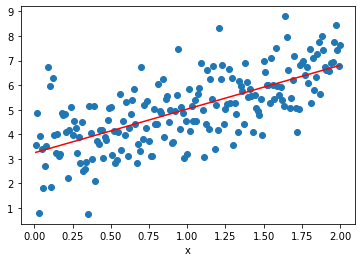

In [8]:
def plot_regression(predicted_y, actual_y, x):
    plt.scatter(x, actual_y)
    plt.plot(x,predicted_y,'r')
    plt.xlabel('x')
    plt.show()

print(f"The value of theta is {theta}, the training error is {error(y,predicted_y,len(X))}")
plot_regression(predicted_y,y,x_input)


## Question 3(b)

In [9]:
#hypothesis for the gradient descent
## weight vector for gradient descent algo
learning_rate = 0.01
#batch_size = n.o training example
num_training_examples = len(X)
epochs = 5

def hypothesis(theta, offset, X):
    return X.dot(theta) + offset


In [10]:
## weight vector for gradient descent algo
learning_rate = 0.01
#batch_size = n.o training example
batch_size = len(X)
epochs = 5

# use the err function in part 1 

def initial_values():
    theta = np.zeros(2)
    offset = 0.0
    return theta, offset

def batch_gradient_descent_algorithm(epoch, theta, learning_rate, n,X,y):
    min_error = float('inf')
    for i in range(epoch):
        #each training example
        theta += (learning_rate/n)* (y-X.dot(theta)).dot(X)
        err = error(y,X.dot(theta),n)
        print(f"At epoch {i+1} theta = {theta} error = {err}")
        if err < min_error:
            min_error = err
        print(f"Minimum error is {min_error}")
    return theta, min_error

At epoch 1 theta = [0.05035202 0.0565422 ] error = 13.219917694196356
Minimum error is 13.219917694196356
At epoch 2 theta = [0.09963227 0.11181881] error = 12.677517326806719
Minimum error is 12.677517326806719
At epoch 3 theta = [0.14786419 0.16585759] error = 12.158610566668758
Minimum error is 12.158610566668758
At epoch 4 theta = [0.1950707  0.21868571] error = 11.66217914521818
Minimum error is 11.66217914521818
At epoch 5 theta = [0.24127422 0.27032973] error = 11.18724893007848
Minimum error is 11.18724893007848


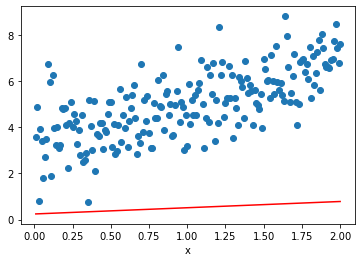

In [11]:
#run the BGD
theta, offset = initial_values()
theta, minimum_training_err = batch_gradient_descent_algorithm(epochs, theta,learning_rate,batch_size, X,y)

#plotting 
plot_regression(X.dot(theta),y,x_input)

In [12]:
# Stochastic gradient
theta,offset = initial_values()
def stochastic_gradient_descent(n,epoch, theta, learning_rate,y,x):
    minimum_training_err = float('inf')
    total_sample_run = n * epoch
    for i in range(total_sample_run):
        t = random.randrange(0,n)
        theta += learning_rate * (y[t]-x[t].dot(theta)) * x[t]
        err = error(y[t],x.dot(theta),n)
        if minimum_training_err > err:
            minimum_training_err = err
    print(f'Stochastic gradient descent: \n After 5 epochs, \n the training error is {err} and the minimum error is {minimum_training_err}')
    return theta, minimum_training_err

theta, min_training_err = stochastic_gradient_descent(batch_size, epochs, theta, learning_rate,y,X)

Stochastic gradient descent: 
 After 5 epochs, 
 the training error is 1.0377286796322844 and the minimum error is 0.09232776765176409


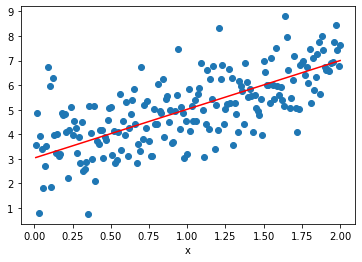

In [13]:
# plot
plot_regression(X.dot(theta),y,x_input)

## Question 3(c)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(200, 16)
Order: 2
 The theta array is [3.58076915 0.78341361 0.49659591] the training error is 0.5703016121648224


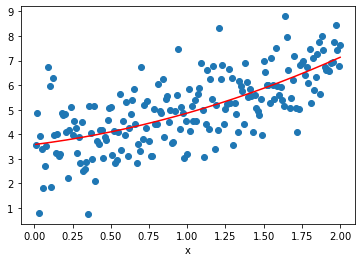

Order: 3
 The theta array is [3.52394943 1.11846512 0.08090267 0.13787504] the training error is 0.570084436469135


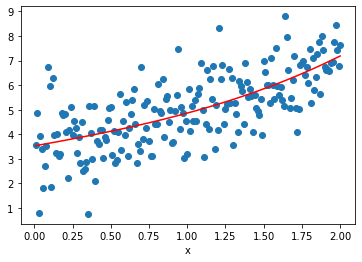

Order: 4
 The theta array is [ 3.85376334 -2.09126966  7.22513464 -5.38187521  1.3730722 ] the training error is 0.5646163879286427


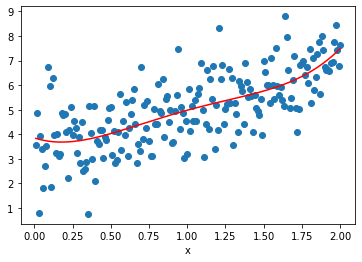

Order: 5
 The theta array is [ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956] the training error is 0.5638968184749199


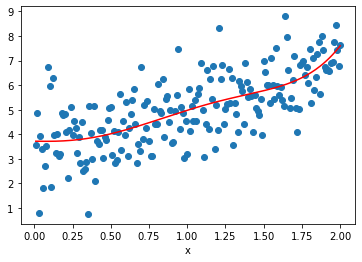

Order: 6
 The theta array is [  3.43194652   5.56010883 -27.43134433  58.72902202 -54.95621241
  23.44890141  -3.72427725] the training error is 0.5613433038902959


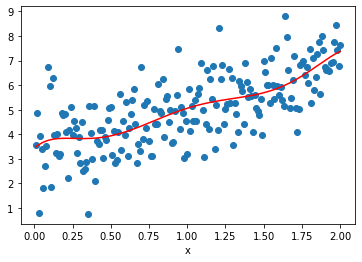

Order: 7
 The theta array is [   2.9816447    17.31146713 -104.72227733  270.37450647 -343.19083519
  229.48681344  -77.69332612   10.51443482] the training error is 0.5562352515818753


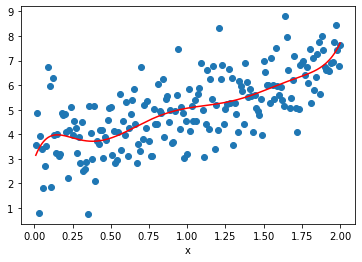

Order: 8
 The theta array is [   2.63575703   28.70152515 -201.17762768  617.80834603 -987.05664253
  893.36525631 -462.31557894  127.58322823  -14.56079476] the training error is 0.5537805799105727


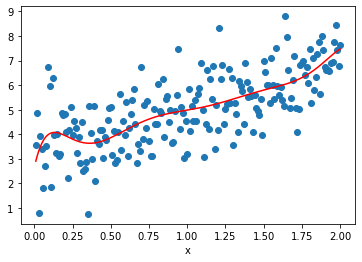

Order: 9
 The theta array is [    2.40963069    37.81831342  -297.49299335  1057.60931015
 -2044.06331635  2358.12602234 -1673.23795319   716.7951622
  -170.18888092    17.205953  ] the training error is 0.5529231246582609


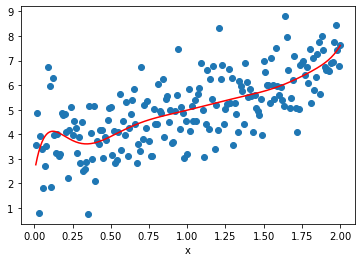

Order: 10
 The theta array is [   2.50101542   33.27065933 -237.48025942  712.79704762 -988.3937664
  455.18785667  445.18103838 -755.91033363  452.1522665  -128.97950506
   14.63470215] the training error is 0.5526261793332455


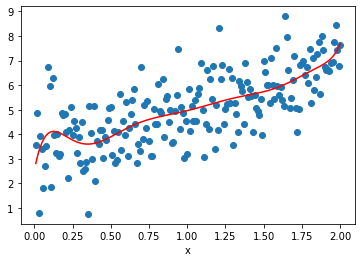

Order: 11
 The theta array is [    2.37077609    38.90151846  -301.00076199  1016.03592682
 -1713.36445618  1333.26464844    76.37100983 -1095.00413513
   997.69393158  -441.31546021   100.45102692    -9.42025673] the training error is 0.5524119623585131


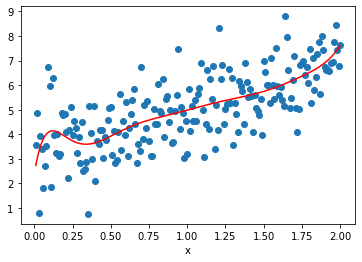

Order: 12
 The theta array is [    2.32211035    39.98008657  -299.67860985   934.10771942
 -1294.22747421   459.8719101    745.00450897  -625.6905899
  -438.49257469   876.69783783  -523.72828293   144.49598885
   -15.67244005] the training error is 0.5511194798203267


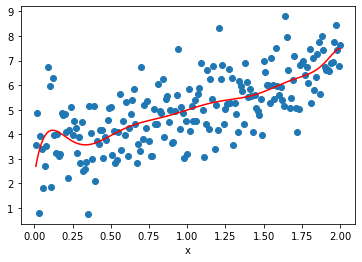

Order: 13
 The theta array is [   2.39410409   36.24026085 -251.27291012  683.33960676 -698.37795353
  -97.88431692  543.11996794   88.86032754 -481.43335342  -60.36083519
  518.04932976 -381.03283453  116.89045238  -13.56389964] the training error is 0.549881357182039


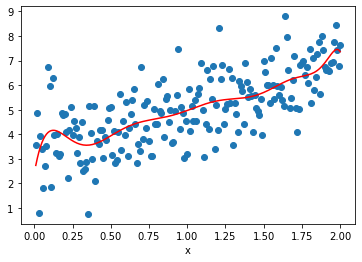

Order: 14
 The theta array is [   2.55417772   29.92889535 -188.43018627  436.54512405 -293.5806675
 -224.38866663  199.96200657  242.3648653   -93.26859093 -258.3907299
   48.14764071  271.87661362 -237.6206789    78.82333302   -9.58840635] the training error is 0.5497955265462943


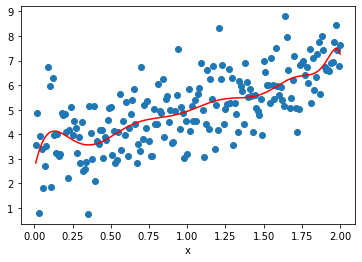

Order: 15
 The theta array is [   2.77015501   22.68646064 -128.38300085  248.94159698  -85.31813145
 -169.43047333   11.23730648  145.49595594   74.02253973  -92.73715043
 -119.89619684   55.17682743  134.11496639 -135.43737364   47.67689073
   -6.00407821] the training error is 0.5513490683796939


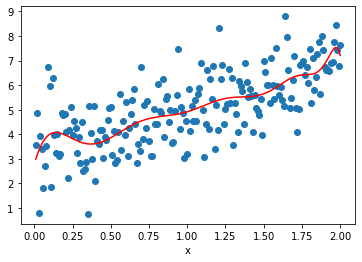

The order with the lowest training error is 14, where the error value is 0.5497955265462943


In [23]:
number_training_examples = len(X)
def PolyRegress(x,y,d):
    list_err = []
    #create a matrix with columns of 1s, 16 columns to be created
    X_matrix = np.ones((num_training_examples,16))
    print(X_matrix)
    print(X_matrix.shape)
    #fill the x_matrix with all the X values
    X_matrix[:,1] = x
    for order in range(2,d+1):
        X_matrix[:,order] = x * X_matrix[:,order-1]
    #by each order of polynomial,
    for order in range(2, d+1):
        #query for specific submatrix from order 1 to that of the highest order
        X = X_matrix[:,:order+1]
        theta = closed_form_regression(X,y)
        predict_y = X.dot(theta)
        err = error(y,predict_y,num_training_examples)
        list_err.append(err)
        print(f"Order: {order}\n The theta array is {theta} the training error is {err}")
        plot_regression(predict_y,y,x)
    return list_err

err_in_order = PolyRegress(x_input,y,15)
degree_with_lowest_err = err_in_order.index(min(err_in_order))+2

print(f"The order with the lowest training error is {degree_with_lowest_err}, where the error value is {min(err_in_order)}")
    

# Question 4

In [25]:
#read the data again
X_input = np.genfromtxt('HW1_data/3/hw1_ridge_x.dat',delimiter=',')
Y_input = np.genfromtxt('HW1_data/3/hw1_ridge_y.dat',delimiter=',')

#split into train and validation set 

#features
vX = X_input[:10, :]
tX = X_input[10:,:]

#responses
vY = Y_input[:10]
tY = Y_input[10:]

print(tX.shape)
print(tY.shape)

(40, 4)
(40,)


## Question 4(a)

In [30]:
# the l stands for lambda
def ridge_regression(tX, tY,l):
    n, num_col = tX.shape
    identity_matrix = np.identity(num_col)
    transpose_x = tX.T
    theta = np.linalg.inv((n*l*identity_matrix)+np.matmul(transpose_x, tX))
    theta = np.matmul(theta, np.matmul(transpose_x, tY))
    return theta
# lambda = 0.15
resulting_theta = ridge_regression(tX,tY,0.15)
print(f"The resulting theta is {resulting_theta}")

The resulting theta is [-0.57939825  1.15033028  0.04934122 -1.59867896]


## Question 4(b)

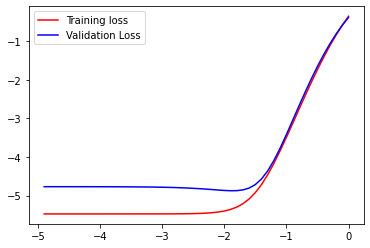

The value of lambda that minimises validation loss is 0.012589254117941668


In [33]:
tn = tX.shape[0] 
vn = vX.shape[0] 
tloss = []
vloss = []

index = -np.arange(0,5,0.1)

for i in index:
    w = ridge_regression(tX,tY,10**i)
    tloss = tloss+[np.sum((np.dot(tX,w)-tY)**2)/tn/2]
    vloss = vloss+[np.sum((np.dot(vX,w)-vY)**2)/vn/2]

plt.plot(index, np.log(tloss), 'r',label="Training loss")
plt.plot(index, np.log(vloss), 'b', label="Validation Loss")
plt.legend()
plt.show()

min_val_loss = min(vloss)
min_loss_idx = vloss.index(min_val_loss)
lambda_val = index[min_loss_idx]
print(f"The value of lambda that minimises validation loss is {10**lambda_val}")
